# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Create ML Models, Train Them, and Make Predictions with Betting Data

First, we prepare our data for training

In [2]:
train_data = pd.read_csv('prepared_data/train_bets_data.csv')
test_data = pd.read_csv('prepared_data/test_bets_data.csv')

In [3]:
target = 'FTR'

train_labels = train_data[target].copy()
test_labels = test_data[target].copy()

# Drop 'FTR' column
train_set = train_data.drop(target, axis=1)
test_set = test_data.drop(target, axis=1)

Here are the classification models we are using to make predictions:
* Stochastic Gradient Descent (SGD) Classifier
* Decision Tree Classifier
* Random Forest Classifier
* Support Vector Classifier (SVC)

Now, we set them up with default parameters.

In [4]:
sgd = SGDClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)

Then, we fit the models with the data we prepared.

In [5]:
sgd.fit(train_set, train_labels)
dt.fit(train_set, train_labels)
rf.fit(train_set, train_labels)
svc.fit(train_set, train_labels)

SVC(random_state=42)

We can use the fit models to make predictions.

In [6]:
y_train_sgd = sgd.predict(train_set)
y_pred_sgd = sgd.predict(test_set)

y_train_dt = dt.predict(train_set)
y_pred_dt = dt.predict(test_set)

y_train_rf = rf.predict(train_set)
y_pred_rf = rf.predict(test_set)

y_train_svc = svc.predict(train_set)
y_pred_svc = svc.predict(test_set)

To review the inital results, we will use these predictions to build classification reports

In [7]:
print("Training performance")
print("SGD")
print(classification_report(train_labels, y_train_sgd))
print("Decision Tree")
print(classification_report(train_labels, y_train_dt))
print("Random Forest")
print(classification_report(train_labels, y_train_rf))
print("SVC")
print(classification_report(train_labels, y_train_svc))

Training performance
SGD
              precision    recall  f1-score   support

           A       0.65      0.03      0.05       507
           D       0.33      0.01      0.02       350
           H       0.44      0.99      0.61       663

    accuracy                           0.44      1520
   macro avg       0.47      0.34      0.23      1520
weighted avg       0.49      0.44      0.29      1520

Decision Tree
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       507
           D       1.00      1.00      1.00       350
           H       1.00      1.00      1.00       663

    accuracy                           1.00      1520
   macro avg       1.00      1.00      1.00      1520
weighted avg       1.00      1.00      1.00      1520

Random Forest
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       507
           D       1.00      1.00      1.00       350
           H       1.0

c:\Users\nguye\anaconda3\envs\dsci641\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nguye\anaconda3\envs\dsci641\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nguye\anaconda3\envs\dsci641\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
print("Test performance")
print("SGD")
print(classification_report(test_labels, y_pred_sgd))
print("Decision Tree")
print(classification_report(test_labels, y_pred_dt))
print("Random Forest")
print(classification_report(test_labels, y_pred_rf))
print("SVC")
print(classification_report(test_labels, y_pred_svc))

Test performance
SGD
              precision    recall  f1-score   support

           A       0.72      0.19      0.30       123
           D       0.00      0.00      0.00        82
           H       0.50      0.98      0.66       175

    accuracy                           0.51       380
   macro avg       0.40      0.39      0.32       380
weighted avg       0.46      0.51      0.40       380

Decision Tree
              precision    recall  f1-score   support

           A       0.48      0.40      0.43       123
           D       0.29      0.29      0.29        82
           H       0.57      0.63      0.60       175

    accuracy                           0.48       380
   macro avg       0.44      0.44      0.44       380
weighted avg       0.48      0.48      0.48       380

Random Forest
              precision    recall  f1-score   support

           A       0.54      0.66      0.59       123
           D       0.30      0.15      0.20        82
           H       0.64   

c:\Users\nguye\anaconda3\envs\dsci641\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nguye\anaconda3\envs\dsci641\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nguye\anaconda3\envs\dsci641\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## View the Results and Compare with Training Data

In [9]:
acc_train_sgd = accuracy_score(train_labels, y_train_sgd)
acc_train_dt = accuracy_score(train_labels, y_train_dt)
acc_train_rf = accuracy_score(train_labels, y_train_rf)
acc_train_svc = accuracy_score(train_labels, y_train_svc)

acc_test_sgd = accuracy_score(test_labels, y_pred_sgd)
acc_test_dt = accuracy_score(test_labels, y_pred_dt)
acc_test_rf = accuracy_score(test_labels, y_pred_rf)
acc_test_svc = accuracy_score(test_labels, y_pred_svc)

### Display Bar Plots for All Algorithms

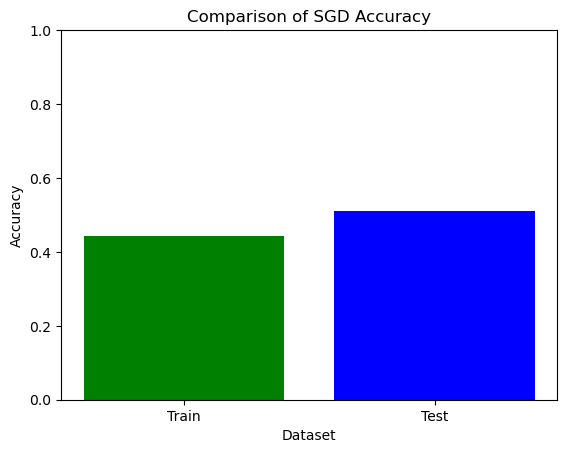

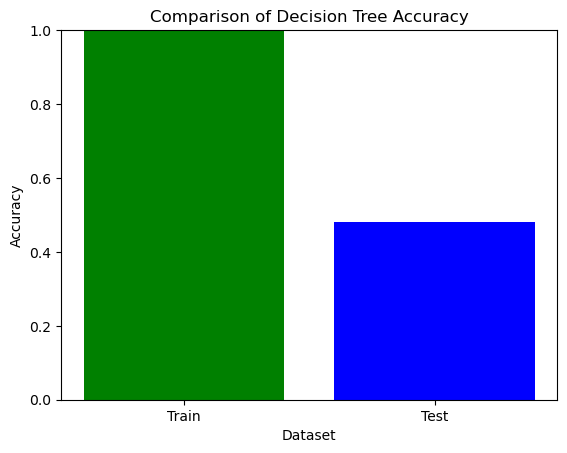

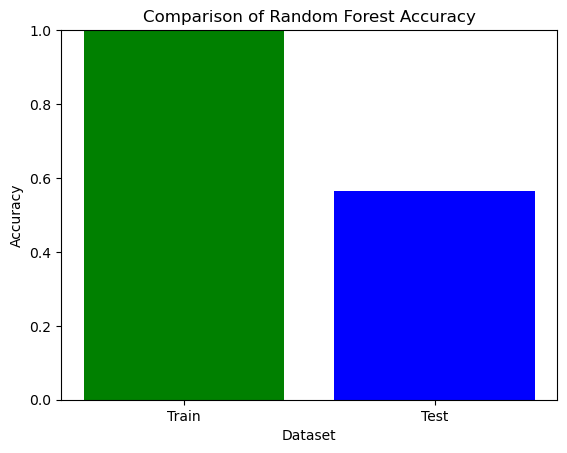

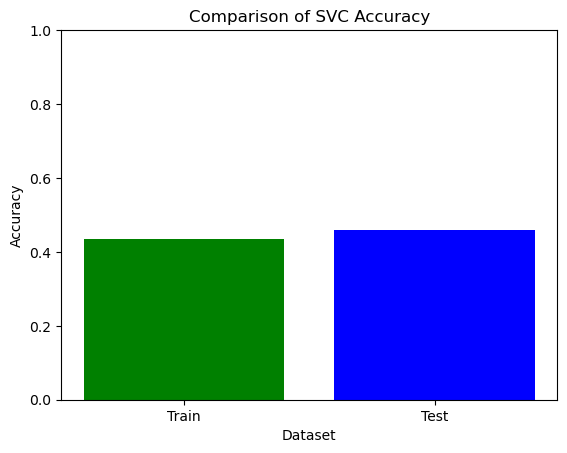

In [10]:
train_scores = [acc_train_sgd, acc_train_dt, acc_train_rf, acc_train_svc]
test_scores = [acc_test_sgd, acc_test_dt, acc_test_rf, acc_test_svc]
algos = ["SGD", "Decision Tree", "Random Forest", "SVC"]

for i in range(len(train_scores)):
    # Plotting the comparison
    plt.bar(['Train', 'Test'], [train_scores[i], test_scores[i]], color=['green', 'blue'])
    plt.xlabel('Dataset')
    plt.ylabel('Accuracy')
    plt.title('Comparison of ' + algos[i] + ' Accuracy')
    plt.ylim(0, 1)  # F1-score ranges from 0 to 1
    plt.show()

### Display Confusion Matrices for the Test Results According to Each Model

<Figure size 800x600 with 0 Axes>

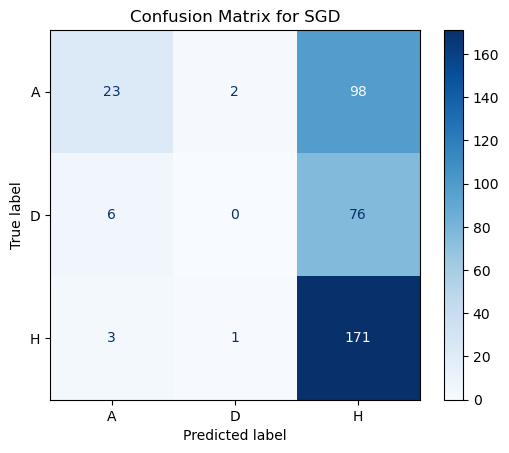

<Figure size 800x600 with 0 Axes>

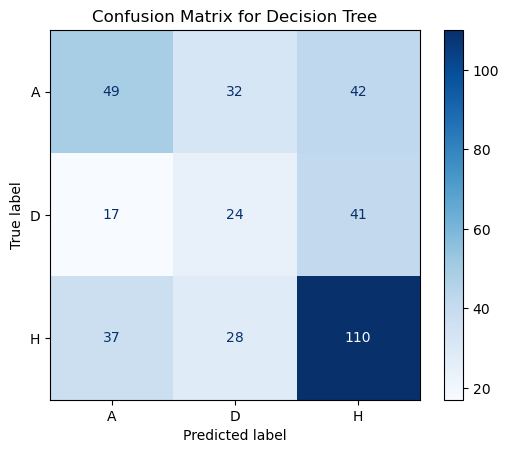

<Figure size 800x600 with 0 Axes>

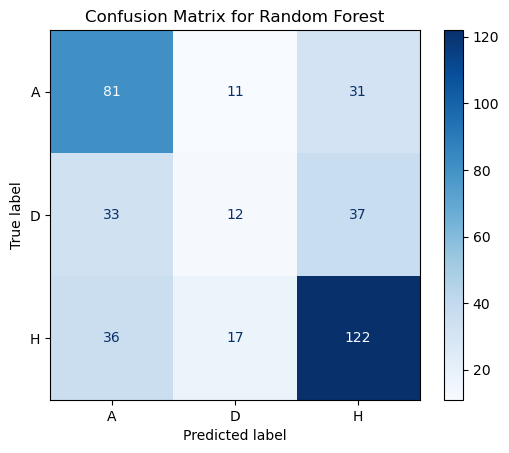

<Figure size 800x600 with 0 Axes>

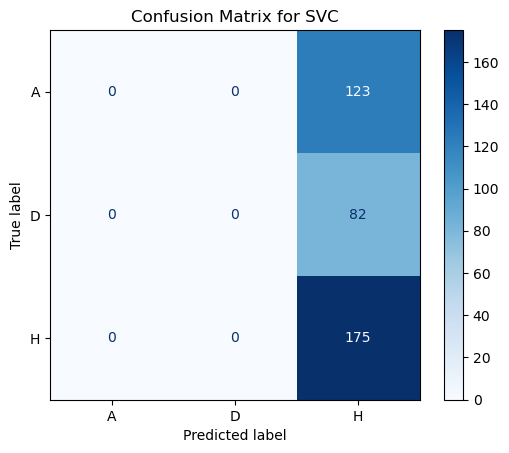

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

preds = [y_pred_sgd, y_pred_dt, y_pred_rf, y_pred_svc]

for i in range(len(algos)):
    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay.from_predictions(test_labels, preds[i], cmap='Blues')
    plt.title('Confusion Matrix for ' + algos[i])
    plt.show()

Surprisingly the default SVC model only predicted Home wins.

Let's see how much of a difference the results would be if we add some hyperparameter tuning.

# Hyperparameter Tuning

First, we'll tune the hyperparameters of the decision tree.

In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(train_set, train_labels)
best_dtree = grid_search.best_estimator_ # Get the best estimator from the grid search

best_dt_res = best_dtree.predict(test_set)

acc_best_dt = accuracy_score(test_labels, best_dt_res)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"Test accuracy: {acc_best_dt}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Test accuracy: 0.5394736842105263


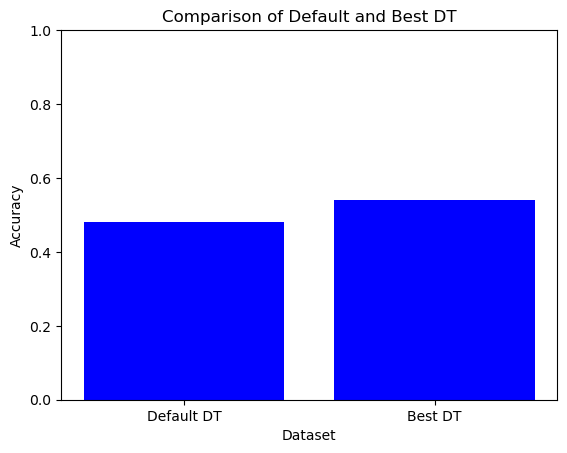

In [13]:
# Plotting the comparison
plt.bar(['Default DT', 'Best DT'], [acc_test_dt, acc_best_dt], color='blue')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Comparison of Default and Best DT')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

As we can see here, the improvement in accuracy is not that much. Next, we'll try hyperparameter tuning with the random forest model.

In [14]:
# Define the parameter grid to tune the hyperparameters
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(train_set, train_labels)
best_rf = grid_search.best_estimator_ # Get the best estimator from the grid search

best_rf_res = best_rf.predict(test_set)

acc_best_rf = accuracy_score(test_labels, best_rf_res)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"Test accuracy: {acc_best_rf}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 6, 'n_estimators': 25}
Test accuracy: 0.5736842105263158


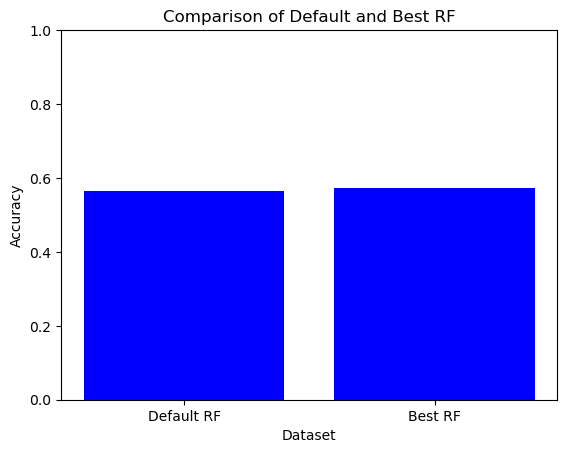

In [15]:
# Plotting the comparison
plt.bar(['Default RF', 'Best RF'], [acc_test_rf, acc_best_rf], color='blue')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Comparison of Default and Best RF')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

Same case with the decision tree, the improvement is minimal. Now on to the SGD model.

In [16]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(train_set, train_labels)
best_sgd = grid_search.best_estimator_ # Get the best estimator from the grid search

best_sgd_res = best_sgd.predict(test_set)

acc_best_sgd = accuracy_score(test_labels, best_sgd_res)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"Test accuracy: {acc_best_sgd}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters: {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'invscaling', 'loss': 'hinge', 'penalty': 'l1'}
Test accuracy: 0.5631578947368421


c:\Users\nguye\anaconda3\envs\dsci641\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nguye\anaconda3\envs\dsci641\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nguye\anaconda3\envs\dsci641\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\nguye\anaconda3\envs\dsci641\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constrain

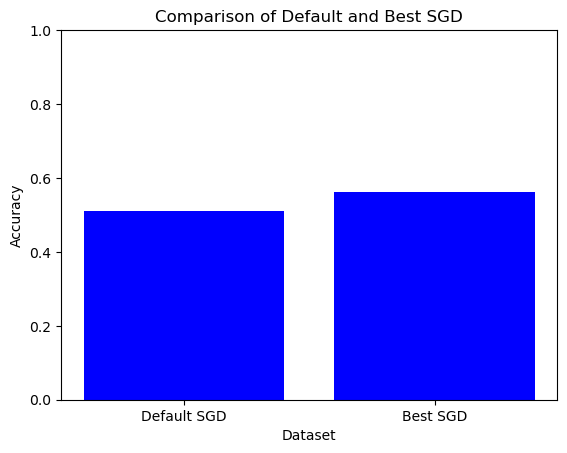

In [17]:
# Plotting the comparison
plt.bar(['Default SGD', 'Best SGD'], [acc_test_sgd, acc_best_sgd], color='blue')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Comparison of Default and Best SGD')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

We can see here that the improvement is more similar to DT model. Finally, we have the SVC model.

In [18]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'sigmoid']
}

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(train_set, train_labels)
best_svc = grid_search.best_estimator_ # Get the best estimator from the grid search

best_svc_res = best_svc.predict(test_set)

acc_best_svc = accuracy_score(test_labels, best_svc_res)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"Test accuracy: {acc_best_svc}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Test accuracy: 0.4605263157894737


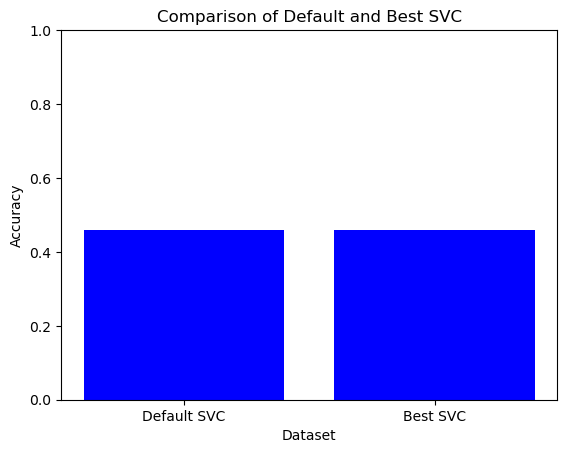

In [19]:
# Plotting the comparison
plt.bar(['Default SVC', 'Best SVC'], [acc_test_svc, acc_best_svc], color='blue')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Comparison of Default and Best SVC')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

As we can see, there's barely a difference in accuracy.

### Plot Final Performance

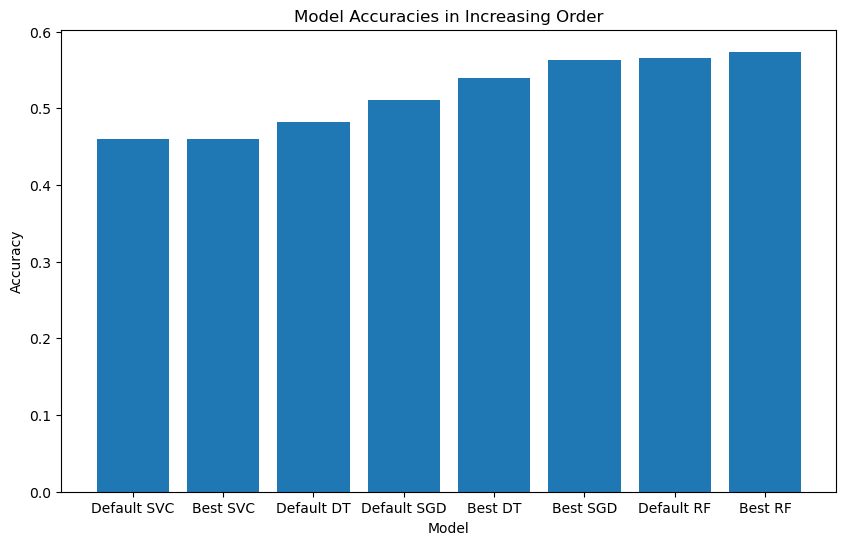

In [20]:
accuracy_data = {'Model': ['Default DT', 'Best DT', 'Default RF', 'Best RF', 'Default SGD',
                           'Best SGD', 'Default SVC', 'Best SVC'],
                'Accuracy': [acc_test_dt, acc_best_dt, acc_test_rf, acc_best_rf, acc_test_sgd, 
              acc_best_sgd, acc_test_svc, acc_best_svc]}

df = pd.DataFrame(accuracy_data)

df = df.sort_values(by='Accuracy')

plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies in Increasing Order')
plt.show()

Conclusively, the models with betting odds perform better than the ones without and the hyperparameter tuned Random Forest model also performed the best. In addition, the models with hyperparameter tuning again produce more accurate results generally than the default ones.